# 1. Contextualização

O Pet Adoption Dataset fornece uma visão compreensiva sobre vários fatores que influenciam a probabilidade de um pet ser adotado de um abrigo. O dataset inclui informações detalhadas sobre animais disponíveis para adoção, cobrindo várias caraterísticas e atributos.

## 1.1. Metas e objetivos 
O objetivo deste projeto é fazer uma breve análise exploratória para entender os fatores que levam ao aumento da probabilidade de adoção dos pets, e criar um modelo com foco de prever a probabilidade de adoção dos pets. 

### Estrutura dos dados

|Coluna|Descrição|
|-------|--------|
|`PetID`|Identificador único de cada pet|
|`PetType`|Tipo do pet (cachorro, gato, etc.)|
|`Breed`|Raça especifica de cada pet|
|`AgeMonths`|Idade do pet em meses|
|`Color`|Cor do pet|
|`Size`|Tamanho do animal (pequeno, médio, grande)|
|`WeightKg`|Peso em kg|
|`Vaccinated`|Status de vacinação|
|`HealthCondition`|Se o pet é saudável|
|`TimeInShelterDays`|Quanto tempo em dias que o pet está no abrigo|
|`AdoptionFee`|Taxa de adoção|
|`PreviousOwner`|Se o pet teve um dono antes ou não|
|`AdoptionLikelihood`|Probabilidade do pet ser adotado|


# 2. Preparação do ambiente
## 2.1. Importação das biblitoecas e carregamento dos dados

In [81]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from lightgbm import LGBMClassifier

# Pré-processamento
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation
from feature_engine import encoding

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('Set1')
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

In [82]:
df = pd.read_csv("../data/raw/pet_adoption_data.csv")

## 2.2. Revisão dos dados

In [83]:
print(f"Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset possui 2007 linhas e 13 colunas.


In [84]:

print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 4 colunas categóricas.
O dataset possui: 9 colunas numéricas.


In [85]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [86]:
df.nunique().sort_values()

Vaccinated               2
HealthCondition          2
PreviousOwner            2
AdoptionLikelihood       2
Size                     3
PetType                  4
Color                    5
Breed                    7
TimeInShelterDays       89
AgeMonths              179
AdoptionFee            493
PetID                 2007
WeightKg              2007
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


# 3. Análise Exploratória de Dados 
## 3.1. Estatísticas descritivas 

In [88]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PetID,2007.0,1503.00,579.52,500.00,1001.50,1503.00,2004.50,2506.0
AgeMonths,2007.0,92.28,52.15,1.00,48.00,94.00,138.00,179.0
WeightKg,2007.0,15.71,8.33,1.02,8.73,15.93,22.74,30.0
Vaccinated,2007.0,0.70,0.46,0.00,0.00,1.00,1.00,1.0
HealthCondition,2007.0,0.20,0.40,0.00,0.00,0.00,0.00,1.0
TimeInShelterDays,2007.0,43.97,25.74,1.00,21.00,45.00,66.00,89.0
AdoptionFee,2007.0,249.14,142.89,0.00,127.00,242.00,375.00,499.0
PreviousOwner,2007.0,0.30,0.46,0.00,0.00,0.00,1.00,1.0
AdoptionLikelihood,2007.0,0.33,0.47,0.00,0.00,0.00,1.00,1.0


Os dados não possuem nenhuma discrepancia aparente, a média e mediana das variáveis numéricas segue bem próxima indicando ausência de outliers.

In [89]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
PetType,2007,4,Dog,522
Breed,2007,7,Rabbit,493
Color,2007,5,White,420
Size,2007,3,Medium,714


- Os animais em maior número nos abrigos são os cães;
- Animais de cor branca também são os em maior quantidade. 

## 3.2. Features e o target

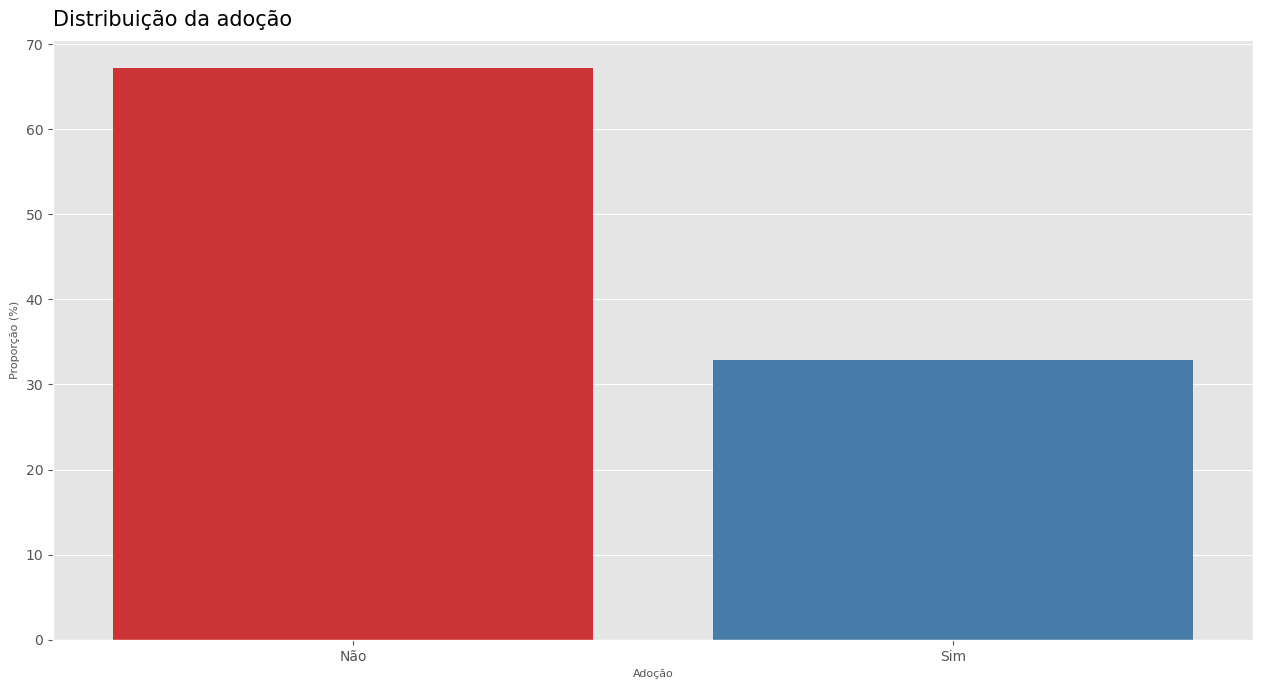

In [90]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.AdoptionLikelihood, hue = df.AdoptionLikelihood, stat = 'percent')
ax.set_title("Distribuição da adoção", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Adoção", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.legend().remove()
plt.show()

Cerca de 32% dos animais são adotados.

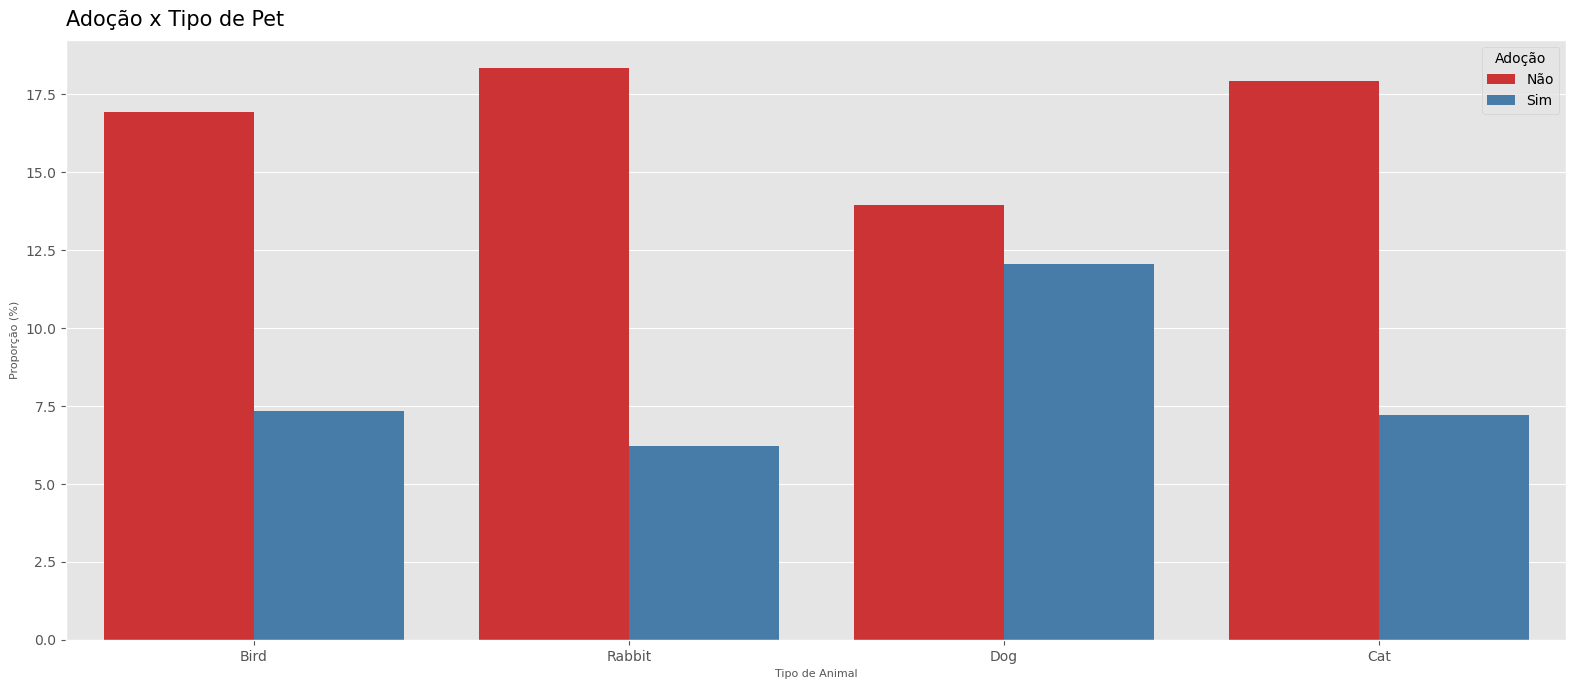

In [92]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.PetType, hue = df.AdoptionLikelihood, stat = 'percent')
ax.set_title("Adoção x Tipo de Pet", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Tipo de Animal", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Não', 'Sim'])
plt.show()

- Cães são o tipo de animal mais frequente dentro do conjunto de dados, coelhos e gatos estão praticamente empatados; 
- Com maior volume de animais em abrigos, cachorros também são os pets mais adotados. Seguidos por passáros e gatos. 

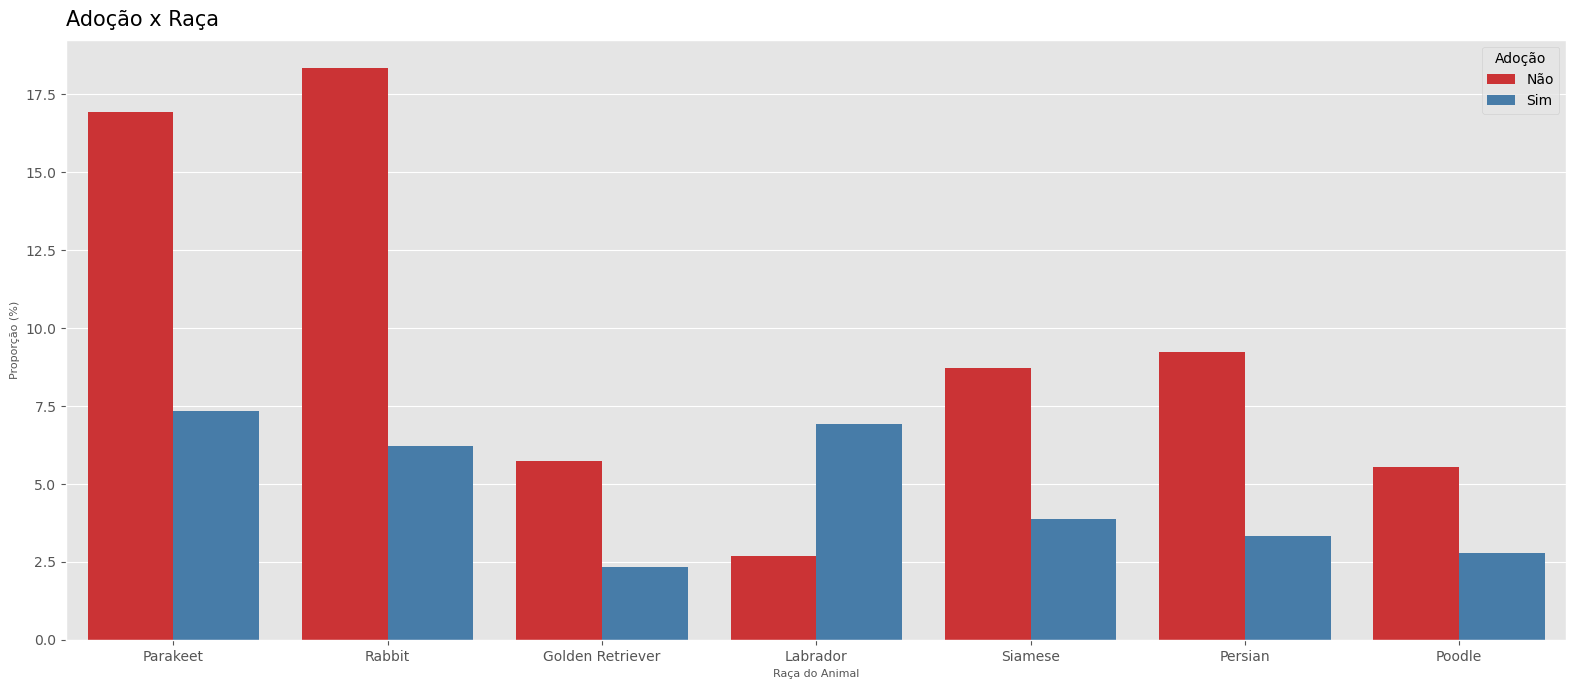

In [93]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.Breed, hue = df.AdoptionLikelihood, stat = 'percent')
ax.set_title("Adoção x Raça", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Raça do Animal", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Não', 'Sim'])
plt.show()

- Não existe distinção entre as raças de coelhos, entre os passáros somente periquitos estão disponíveis; 
- Entre os tipos de animais de estimação que tem raças definidas, os cães da raça Labrador são os mais adotados. Eles são populares por serem amigáveis, inteligentes e sua natureza treinável. 

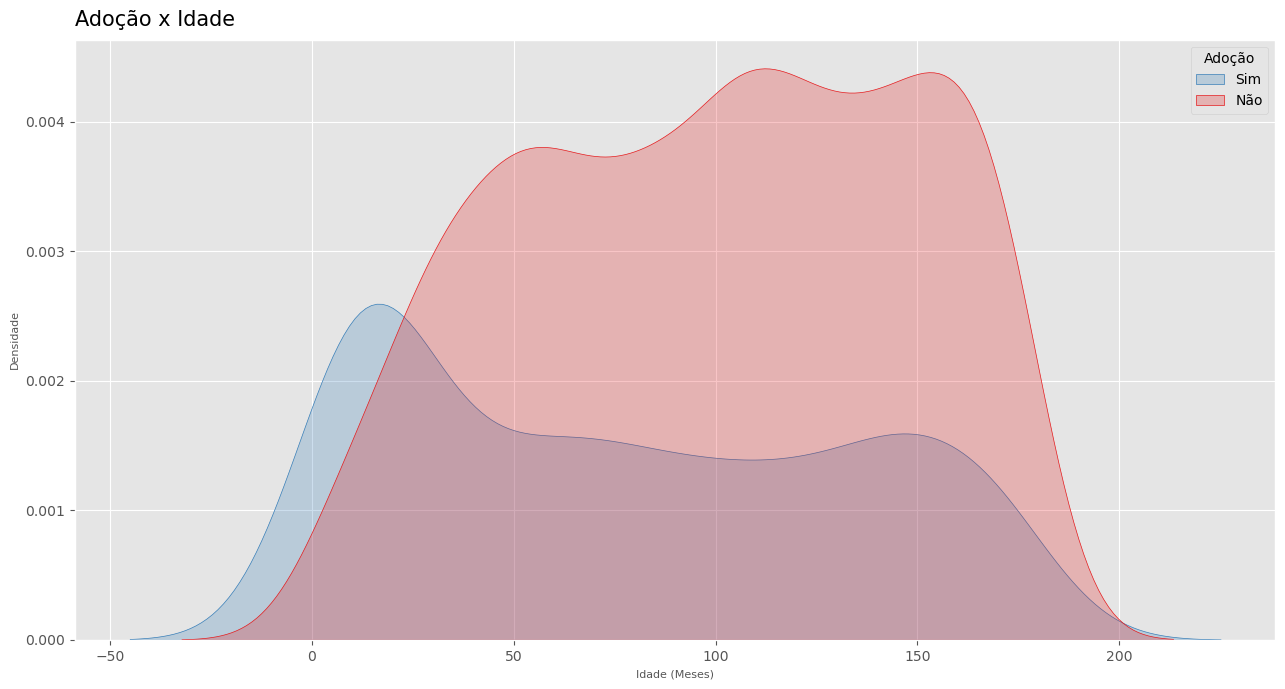

In [94]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.kdeplot(x = df.AgeMonths, hue = df.AdoptionLikelihood, fill = True)
ax.set_title("Adoção x Idade", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Idade (Meses)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Sim', 'Não'])
plt.show()

Pets mais velhos tem menor probabilidade de adoção, o fator saúde é o mais importante critério na adoção de animais.

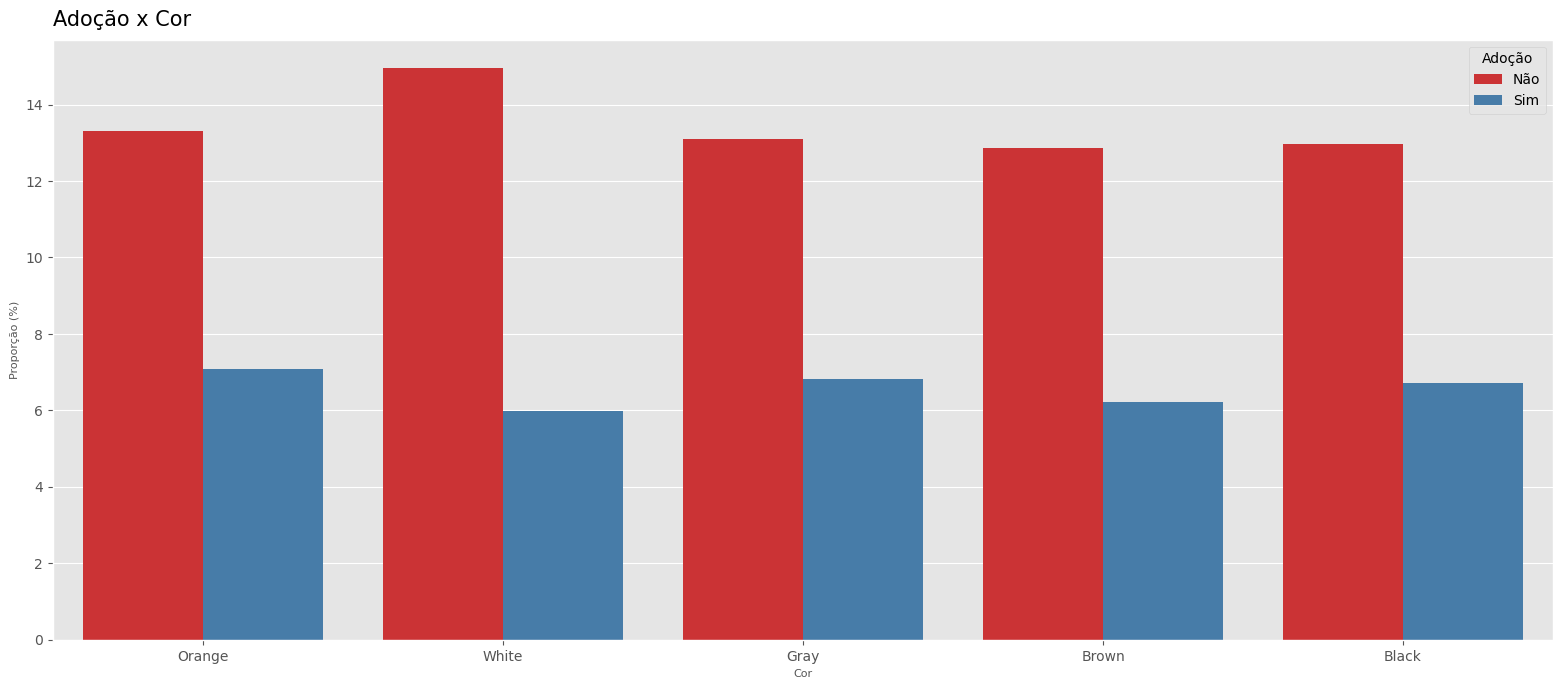

In [95]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.Color, hue = df.AdoptionLikelihood, stat = 'percent')
ax.set_title("Adoção x Cor", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Cor", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Não', 'Sim'])
plt.show()

Apesar de estarem em maior quantidade nos abrigos animais de cor branca são os menos adotados, possivelmente por conta da dificuldade manter eles higienizados.

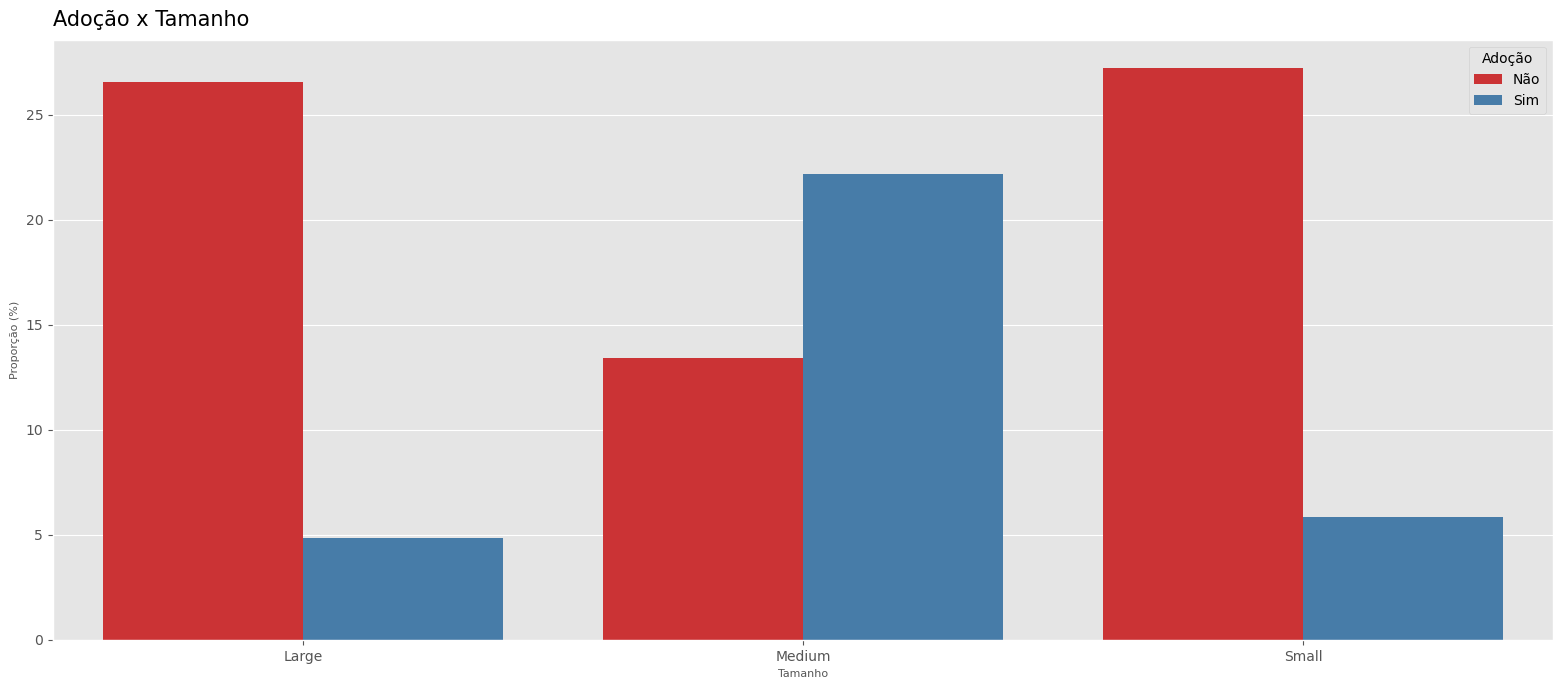

In [96]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.Size, hue = df.AdoptionLikelihood, stat = 'percent')
ax.set_title("Adoção x Tamanho", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Tamanho", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Não', 'Sim'])
plt.show()

Animais de tamanho médio são a maioria tanto em quantidade nos abrigos, quanto em adoções. Animais de porte maior são os menos adotados. 

- A popularidade de adoção de animais de médio porte tem ligação com sua maior adaptabilidade a diversos ambientes e estilos de vida.
- Animais de grande porte precisam de mais espaço, exercício e treinamento, o que pode levar a menor interesse de adoção.

Vamos olhar de forma mais detalhada por tipo de animal.

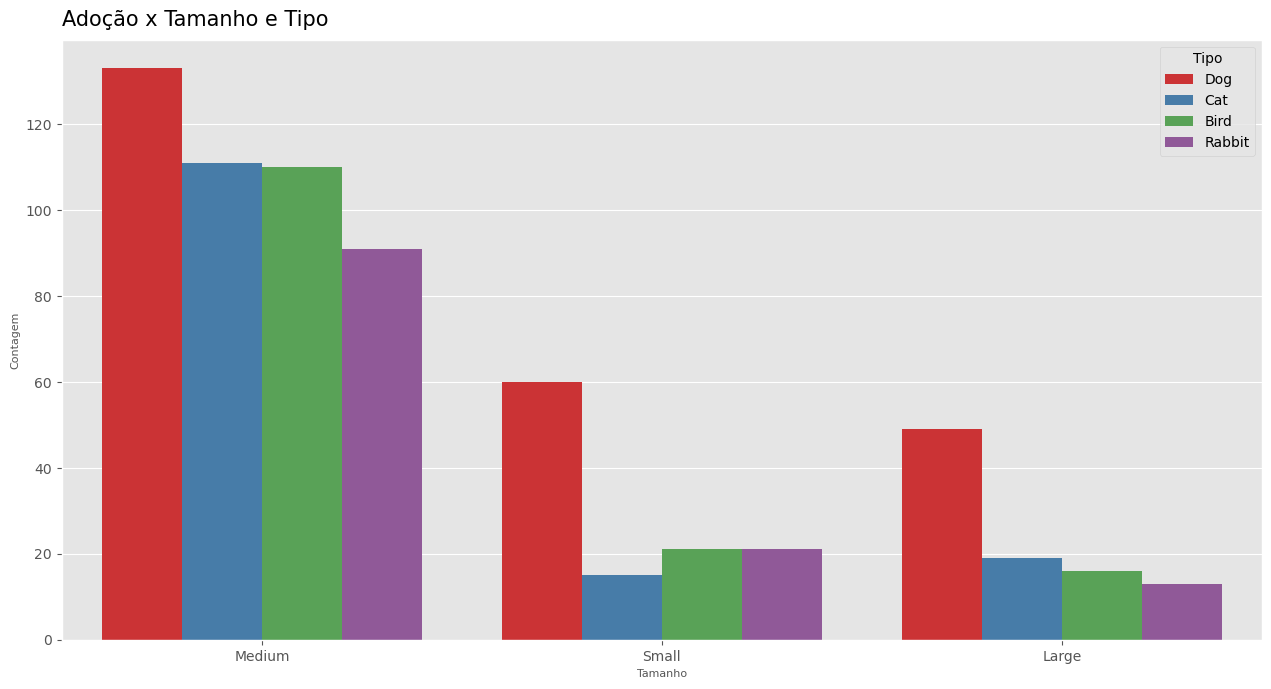

In [97]:
filtro = df[df['AdoptionLikelihood'] == 1].index
adopted = df.loc[filtro]

viz = adopted.groupby(["Size", "PetType"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(viz, x = 'Size', y = 'Count', hue = 'PetType')
ax.set_title("Adoção x Tamanho e Tipo", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Tamanho", fontsize = 8)
ax.set_ylabel("Contagem", fontsize = 8)
ax.legend(title = 'Tipo')
plt.show()

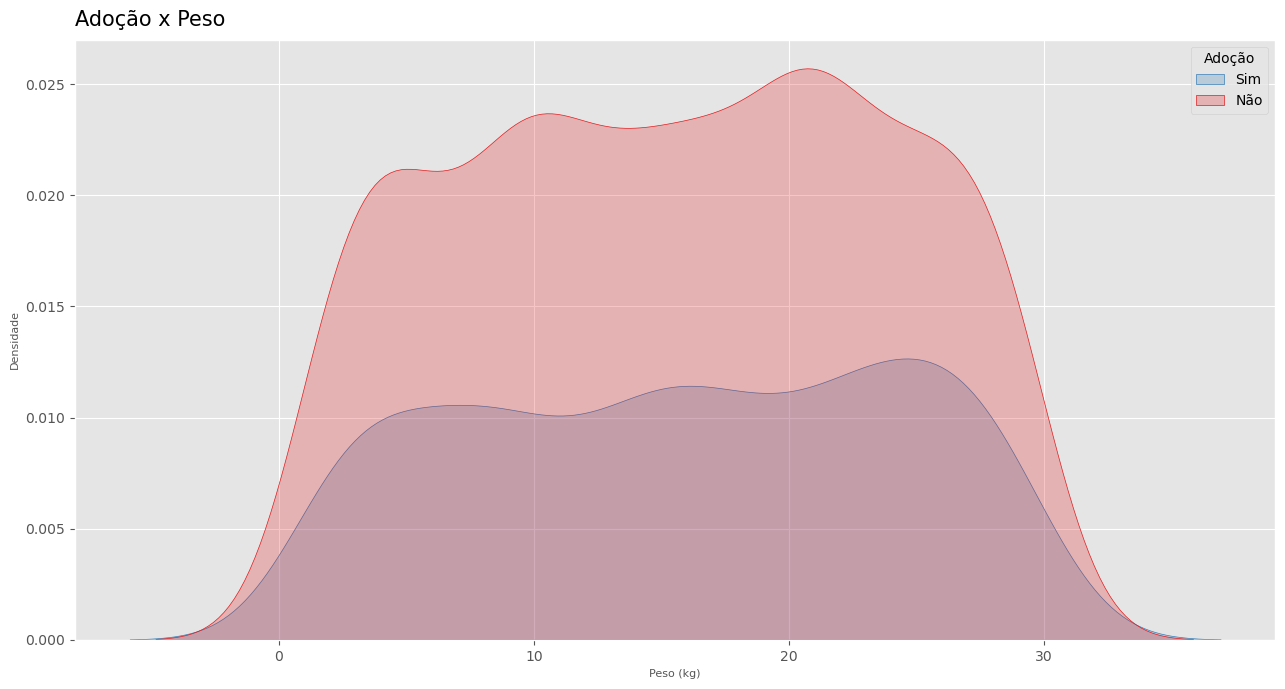

In [98]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.kdeplot(x = df.WeightKg, hue = df.AdoptionLikelihood, fill = True)
ax.set_title("Adoção x Peso", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Peso (kg)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Sim', 'Não'])
plt.show()

Não é possível somente com a visualização determinar uma forte correlação do peso com a probabilidade de adoção, é uma variável bem dispersa. Vale ressaltar que é importante antes da adoção realizar consultas com um médico veterinário pois a saúde de cada pet depende de vários fatores como raça, idade e sexo. 

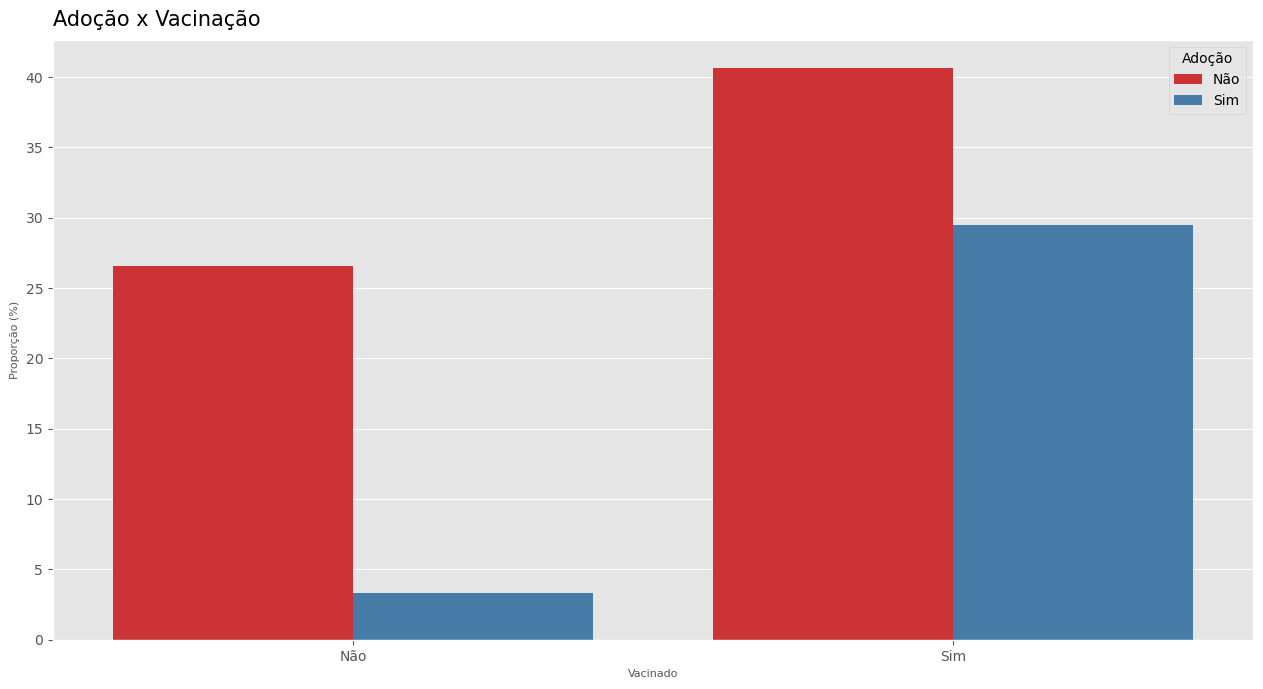

In [99]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.Vaccinated, hue = df.AdoptionLikelihood, fill = True, stat = 'percent')
ax.set_title("Adoção x Vacinação", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Vacinado", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
ax.legend(title = 'Adoção', labels = ['Não', 'Sim'])
plt.show()

Saúde tem sido o fator mais importante observado durante este estudo, vacinação é um dos aspectos mais definidores da saúde de um animal, vacinação é essencial para previnir diversas doenças infecciosas que podem aflingir os bichinhos e serem fatais. 

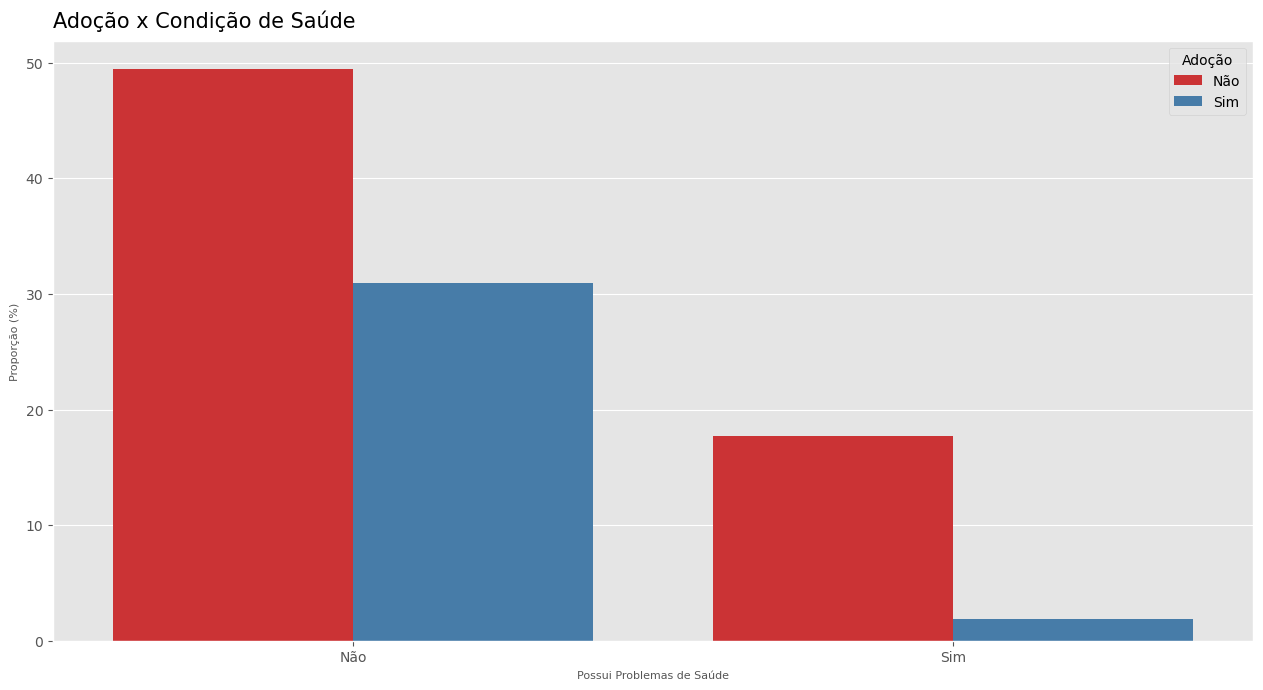

In [100]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.HealthCondition, hue = df.AdoptionLikelihood, fill = True, stat = 'percent')
ax.set_title("Adoção x Condição de Saúde", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Possui Problemas de Saúde", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
ax.legend(title = 'Adoção', labels = ['Não', 'Sim'])
plt.show()

Pessoas que adotam animais com más condições de saúde, tem uma grande paixão pelos bichinhos e estão dispostas a investir tempo, dinheiro e conhecimento para cuidar deles. A baixa taxa de adoção de animais doentes tem ligação com os gastos médicos, problemas comportamentais em potencial e o dano emocional de cuidar de um animal doente. 

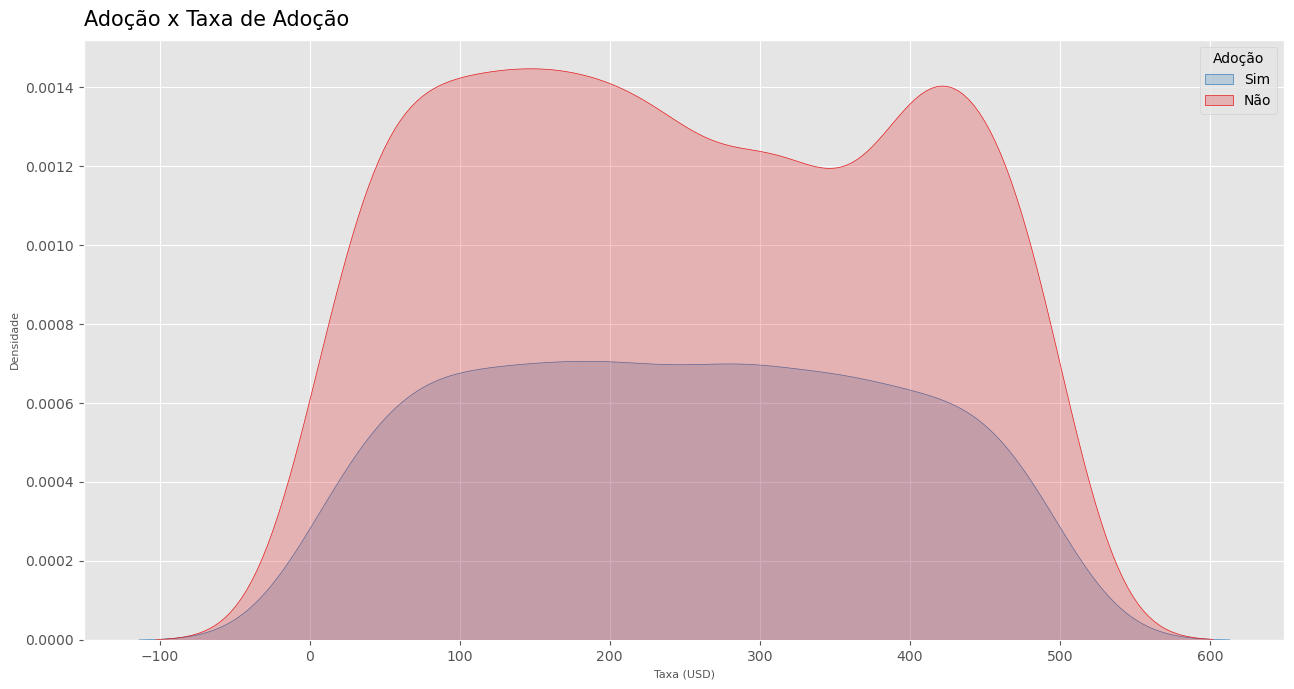

In [104]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.kdeplot(x = df.AdoptionFee, hue = df.AdoptionLikelihood, fill = True)
ax.set_title("Adoção x Taxa de Adoção", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Taxa (USD)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Sim', 'Não'])
plt.show()

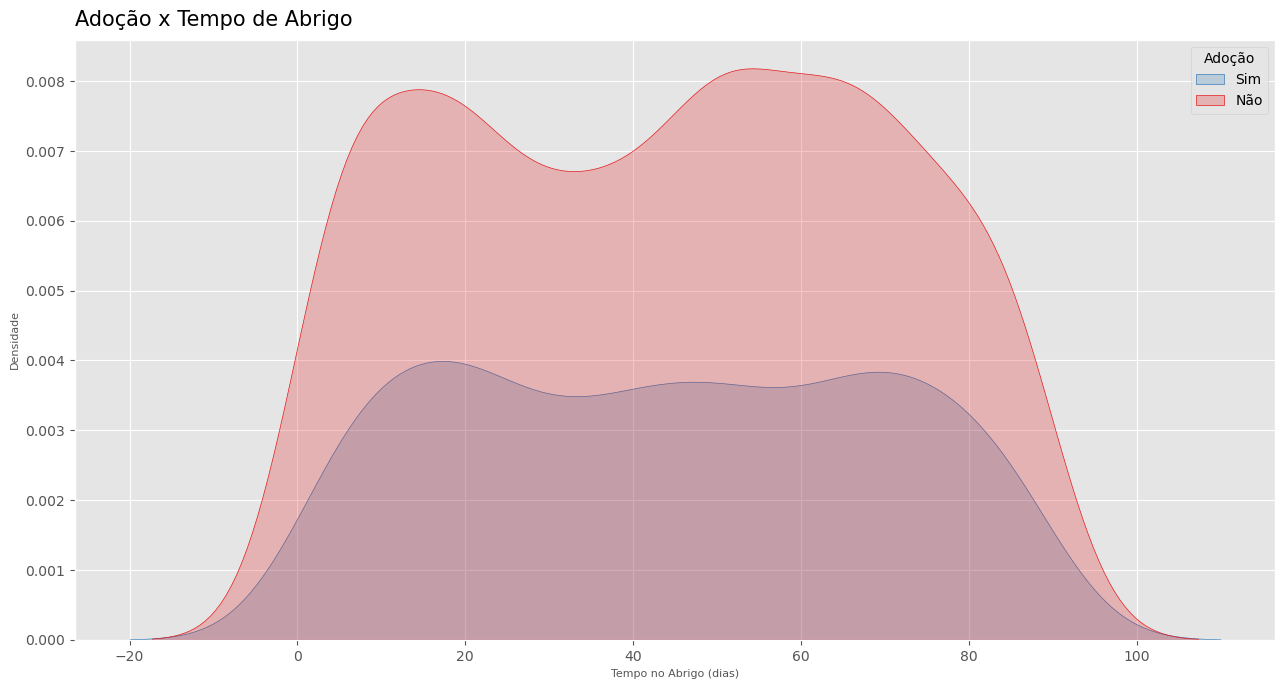

In [101]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.kdeplot(x = df.TimeInShelterDays, hue = df.AdoptionLikelihood, fill = True)
ax.set_title("Adoção x Tempo de Abrigo", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Tempo no Abrigo (dias)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.legend(title = 'Adoção', labels = ['Sim', 'Não'])
plt.show()

Estar muito tempo no abrigo não faz uma grande diferença na probabilidade de adoção.

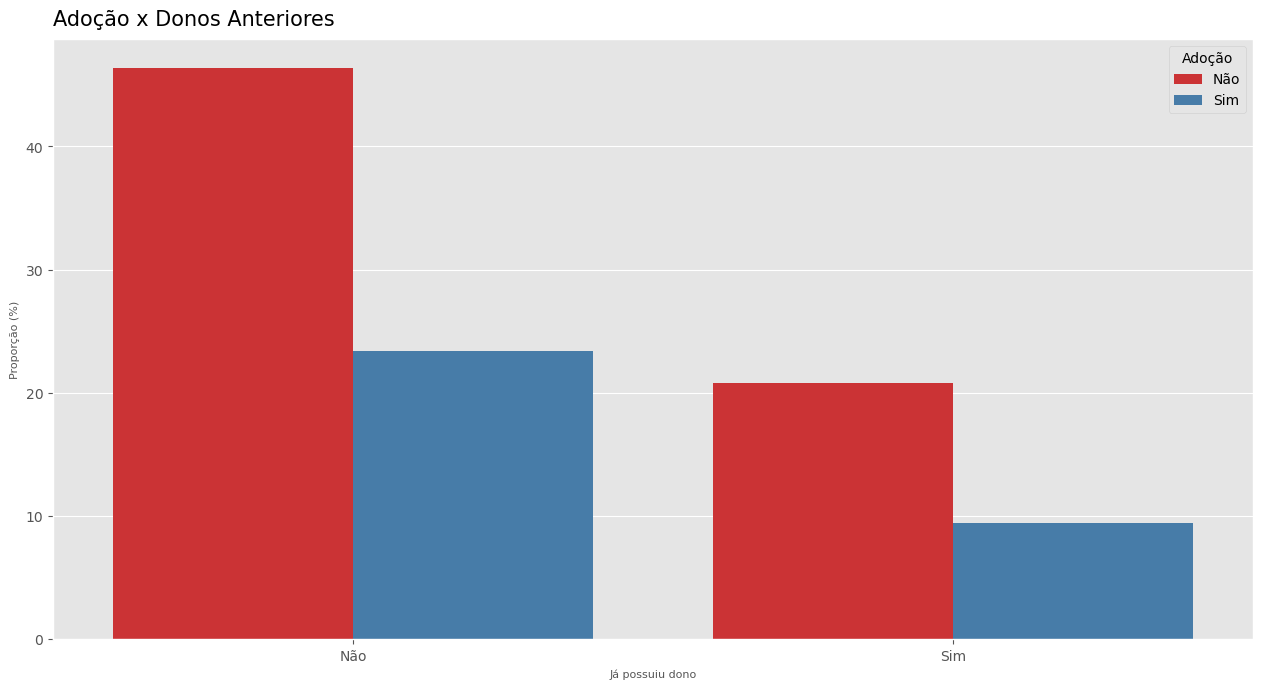

In [102]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x = df.PreviousOwner, hue = df.AdoptionLikelihood, fill = True, stat = 'percent')
ax.set_title("Adoção x Donos Anteriores", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Já possuiu dono", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
ax.legend(title = 'Adoção', labels = ['Não', 'Sim'])
plt.show()

Os pets que já tiveram donos anteriormente tendem a ser menos adotados. 

## 3.3. Matriz de correlação

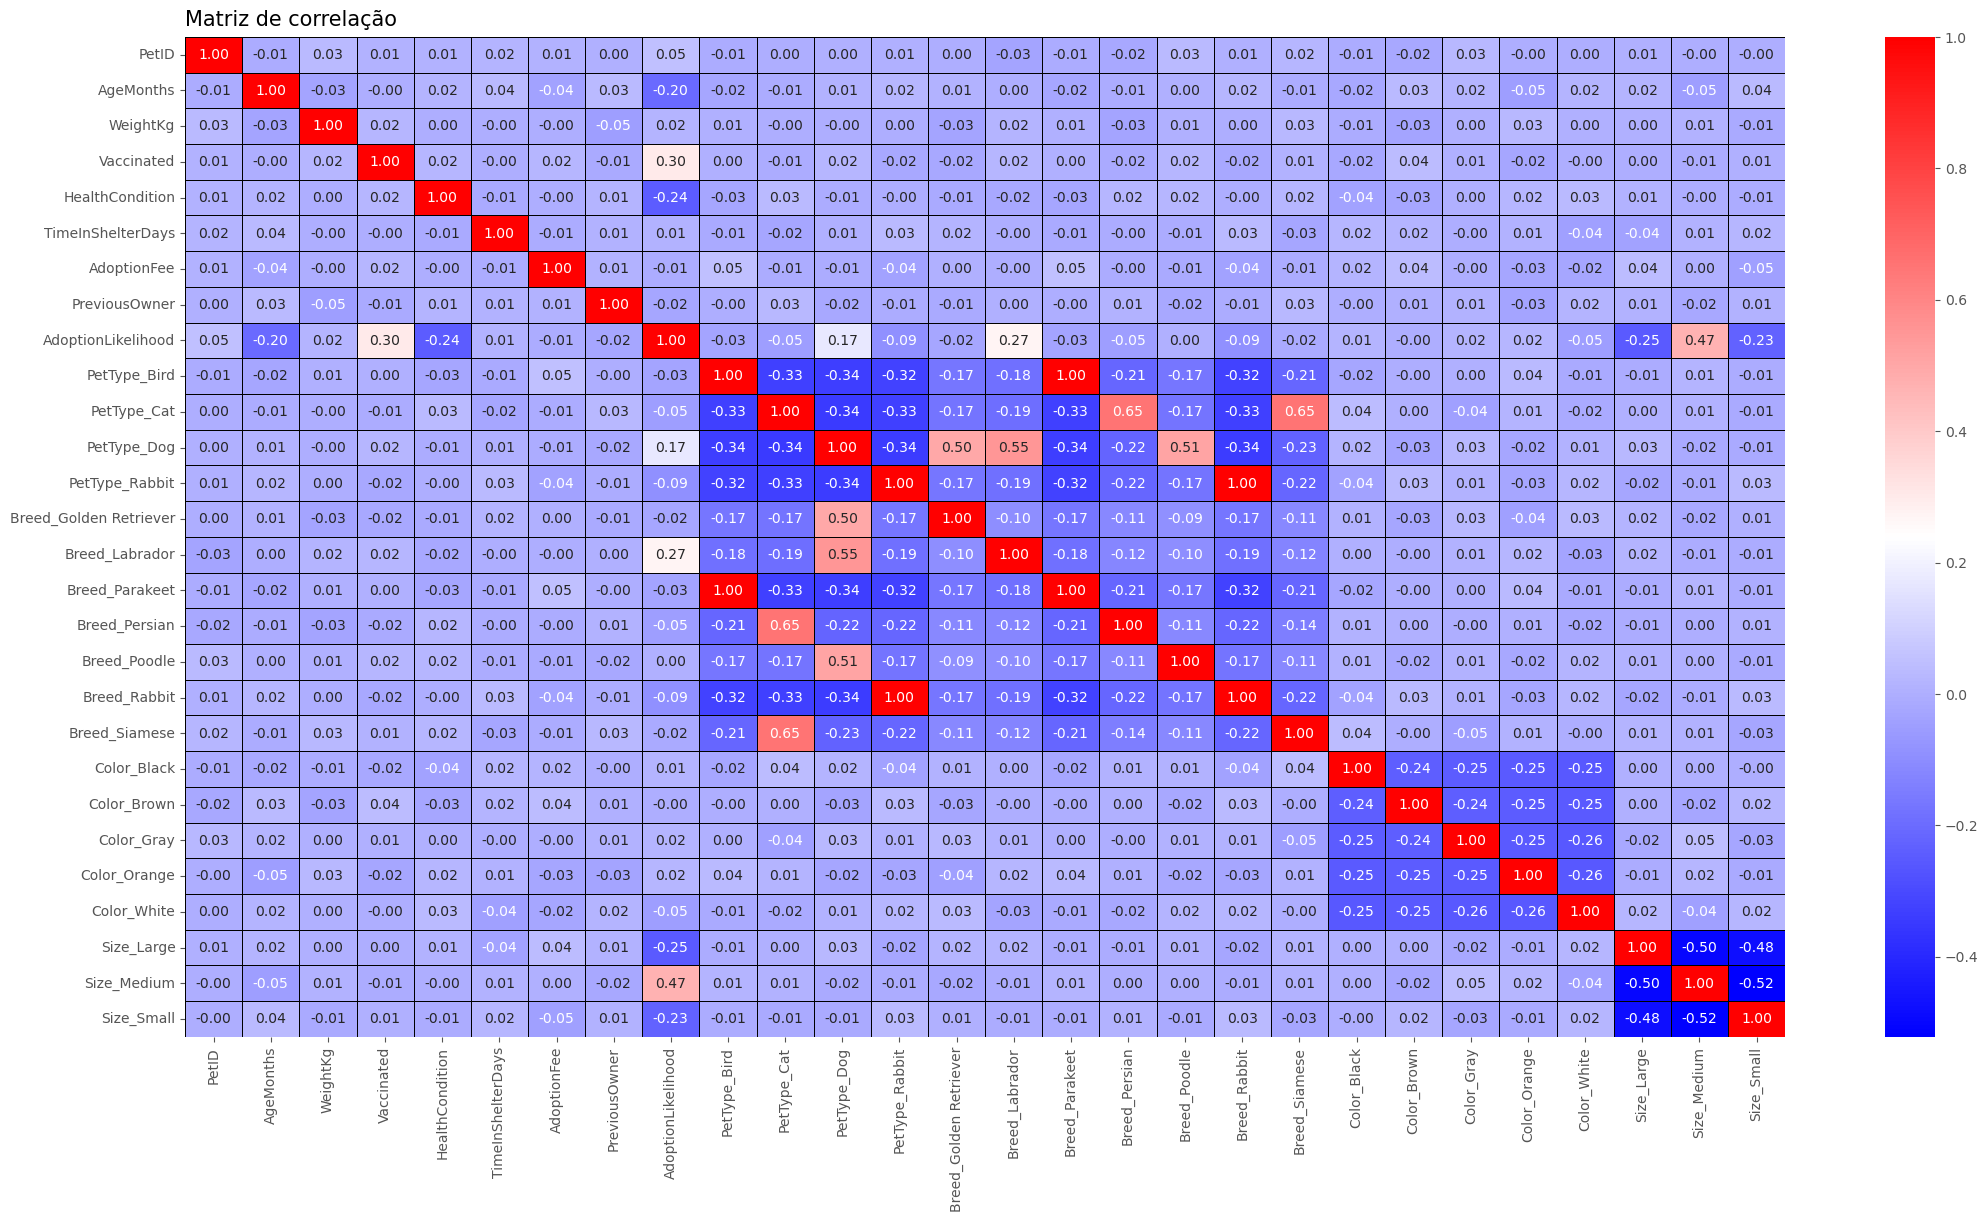

In [103]:
dummies = pd.get_dummies(df, prefix = ['PetType', 'Breed', 'Color', 'Size'], dtype = int)
corr = dummies.corr()

fig = plt.figure(figsize = (20, 10))
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'bwr', linecolor='black', linewidths=0.5)
ax.set_title("Matriz de correlação", fontsize = 15, pad = 8, loc = 'left')
plt.show()

## 3.4. Conclusões pós-análise

- Os fatores que maior influência na adoção de pets são aqueles ligados a saúde como vacinação, condições anteriores de saúde, entre outras questões; 
- Animais de médio porte, em especial cães são aqueles com maior probabilidade de adoção, surpreendentemente para mim passaros são bastante adotados em um empate quase técnico com gatos;
- Animais de cor branca tem menor tendência de adoção, provavelmente pela dificuldade manter-los limpos. Não existe uma grande diferença entre o pet ser recém chegado ou estar a muito tempo no abrigo para a adoção. 

![gato](https://github.com/datalopes1/pet_adoption/blob/main/doc/img/alisa-matthews-ZtHbp39rjIM-unsplash.jpg?raw=true)